c:\Users\AL MAKKAH\Desktop\Artificial intelligence lab\lab_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


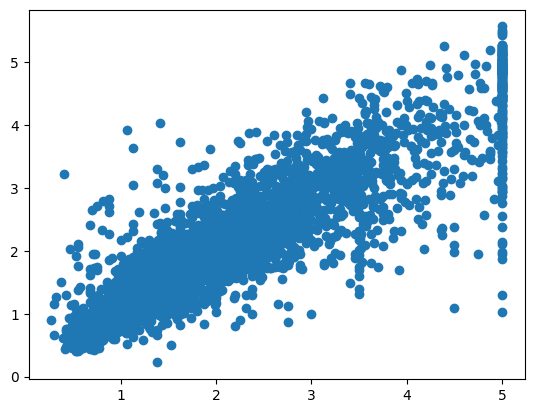

In [1]:
# California housing regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

cal = fetch_california_housing()
X = cal.data; y = cal.target.reshape(-1,1)

scaler_X = StandardScaler(); Xs = scaler_X.fit_transform(X)
scaler_y = StandardScaler(); ys = scaler_y.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(Xs, ys, test_size=0.2)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train,y_train,epochs=50,verbose=0)
pred = model.predict(X_test)
plt.scatter(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(pred)); plt.show()
